In [1]:
using Plots;
using LinearAlgebra;


(process:1472): GLib-GIO-WARNING **: 15:30:49.682: Unexpectedly, UWP app `KDEe.V.Okular_21.1202.912.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


Given $(e^xu'(x))' = 2e^{2x},\ u'(0) = 1,\ u(1) = e$, we wish to set up a numerical scheme to estimate the solution on a uniform grid from 0 to 1. We can begin by discretizing the equation itself, by replacing $u'(x)$ with a second-order accurate centered approximation. Specifically, we combine the centered approximation at $i-\frac{1}{2}$ and $i+\frac{1}{2}$, yielding $e^xu'(x) \approx \frac{1}{h}(e^{i+1/2}\frac{U_{i+1} - U_i}{h} - e^{i-1/2}\frac{U_{i} - U_{i-1}}{h})$.

Since we now have an expression for $u''(x)$, we can approximate a solution. For $h = \frac{1}{4}$, we have $m = 3$. Thus our system $AU = F$ is set up as follows:

$\begin{align*}
A = 
\begin{bmatrix}
-(e^{1/8} + e^{3/8}) & e^{3/8} & 0\\
e^{3/8} & -(e^{3/8} + e^{5/8}) & e^{5/8} \\
0 & e^{5/8} & -(e^{5/8} + e^{7/8})
\end{bmatrix}
\end{align*}$

$\begin{align*}
U = 
\begin{bmatrix}
U_1\\
U_2 \\
U_3
\end{bmatrix}
\end{align*}$

$\begin{align*}
F = 
\begin{bmatrix}
e^{1/4} - (\frac{e^{1/4}}{1/16} - \frac{e^{1/4}}{1/2})\\
e^{1/2} \\
e^{3/4} - e(\frac{e^{3/4}}{1/16} - \frac{e^{3/4}}{1/2})
\end{bmatrix}
\end{align*}$

To compute a solution via this method, first we define some given parameters. Note that $(e^xu'(x))' = e^xu''(x) + e^xu'(x)$ via the chain rule.

In [2]:
h = 0.1;
m = 1/h - 1;
α = 1;
β = ℯ;
a(i) = ℯ^(h*i);
b(i) = ℯ^(h*i);
f(i) = 2*ℯ^(2i*h);

The system being solved is a tridiagonal matrix of the following form:

In [3]:
du = a.(3/2:m-1/2)
d = [-(a(i) + a(i + 1)) for i in (1/2:m-1/2)];
dl = du;
A = Tridiagonal(dl, d, du)

9×9 Tridiagonal{Float64, Vector{Float64}}:
 -2.21311   1.16183    ⋅         ⋅       …    ⋅         ⋅         ⋅ 
  1.16183  -2.44586   1.28403    ⋅            ⋅         ⋅         ⋅ 
   ⋅        1.28403  -2.70309   1.41907       ⋅         ⋅         ⋅ 
   ⋅         ⋅        1.41907  -2.98738       ⋅         ⋅         ⋅ 
   ⋅         ⋅         ⋅        1.56831       ⋅         ⋅         ⋅ 
   ⋅         ⋅         ⋅         ⋅       …   1.91554    ⋅         ⋅ 
   ⋅         ⋅         ⋅         ⋅          -4.03254   2.117      ⋅ 
   ⋅         ⋅         ⋅         ⋅           2.117    -4.45665   2.33965
   ⋅         ⋅         ⋅         ⋅            ⋅        2.33965  -4.92536

The right-hand side of the system is defined using the lowest order term of the differential equation, and the functional coefficients of the higher order terms:

In [4]:
F = vcat(
    f(1) - (a(1)/h^2 + b(1)/2h)α,
    f.(2:m-1),
    f(m) - (a(m)/h^2 + b(m)/2h)β
)

9-element Vector{Float64}:
 -113.60014088162266
    2.9836493952825407
    3.644237600781018
    4.451081856984936
    5.43656365691809
    6.640233845473096
    8.11039993368935
    9.90606484879023
 -689.9196215104972

Solving this system yields our approximation. We can compare this to the exact solution, $e^x$:

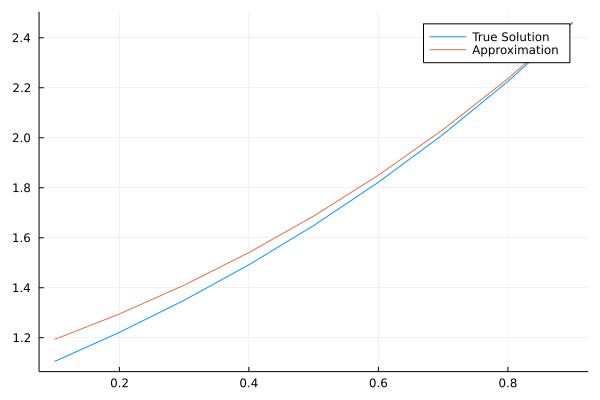

In [5]:
U = (1/h^2 * A) \ F;
u(x) = ℯ^x;
domain = h .* (1:m)
Û = u.(domain);
plot(domain, [Û, U], labels=["True Solution" "Approximation"])

The exact solution also allows us to evaluate the error of our approximation:

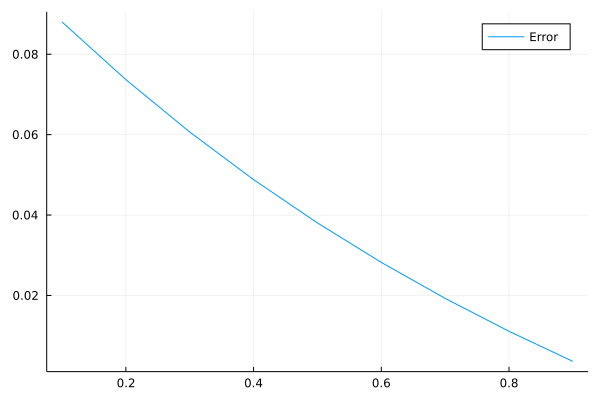

In [6]:
E = U - Û;
plot(domain, E, labels="Error")

Using a centered approximation of $u'(x)$ in terms of our solution, we can estimate the flux $J = -e^xu'(x)$:

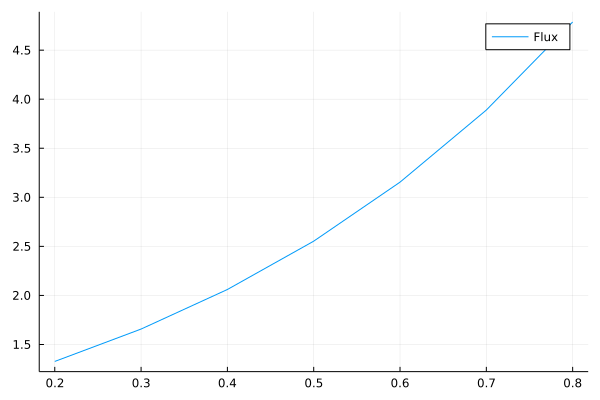

In [7]:
u′(i) = (U[i+1] - U[i-1]) / 2h;
J(i) = ℯ^(i*h) * u′(Int(i));
plot(h .* (2:m-1), J.(2:m-1), labels="Flux")